In [86]:
import pandas as pd
import numpy as np
import datetime as dt

#package for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#package for statistical test (hypothesis testing)
import scipy.stats as stats


In [87]:
# import datsets
claims = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//claims.csv")
cust_data = pd.read_csv("C://Users//SANAM KANDAR//OneDrive//Desktop//Case Study//PYTHON//Python Foundation Case Study 3 - Insurance Claims Case Study//Case Study 3 - Insurance Claims Case Study//cust_demographics.csv")

In [88]:
insurance_data = pd.merge(right = cust_data, left = claims, how="inner", right_on="CUST_ID", left_on="customer_id")

In [89]:
insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


##### 2. Perform a data audit for the datatypes and find out if there are any
##### mismatch within the current datatypes of the columns and their
##### business significance.

In [90]:
insurance_data.shape

(1085, 16)

In [91]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [92]:
insurance_data.select_dtypes(include = ["int", "float"])

,claim_id,customer_id,total_policy_claims,CUST_ID
0,54004764,21868593,1.0,21868593
1,33985796,75740424,3.0,75740424
2,53522022,30308357,1.0,30308357
3,63017412,30308357,6.0,30308357
4,13015401,47830476,1.0,47830476
...,...,...,...,...
1080,62020796,79539873,1.0,79539873
1081,63269067,42364152,1.0,42364152
1082,22690595,19888166,2.0,19888166
1083,12376894,11256802,4.0,11256802


In [93]:
insurance_data.select_dtypes(exclude = ["int", "float"])   

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,Driver error,11/27/2017,Auto,No,Material only,$2980,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,Crime,10/03/2018,Home,Unknown,Material only,$2980,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,Driver error,04/04/2018,Auto,No,Material only,$1950,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,Natural causes,06/17/2018,Auto,No,Material only,$1680,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,Other causes,05/09/2017,Home,No,Material only,$2800,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,Other driver error,04/18/2017,Auto,No,Material only,$2840,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [94]:
insurance_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [95]:
insurance_data.nunique()

claim_id               1085
customer_id            1078
incident_cause            5
claim_date              100
claim_area                2
police_report             3
claim_type                3
claim_amount            676
total_policy_claims       8
fraudulent                2
CUST_ID                1078
gender                    2
DateOfBirth            1078
State                    50
Contact                1078
Segment                   3
dtype: int64

##### 3. Convert the column claim_amount to numeric. Use the appropriate
##### modules/attributes to remove the $ sign.

In [96]:
insurance_data["claim_amount"] = insurance_data["claim_amount"].str.replace("$", "").astype("float64")

C:\Users\SANAM KANDAR\AppData\Local\Temp\ipykernel_13500\429667517.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  insurance_data["claim_amount"] = insurance_data["claim_amount"].str.replace("$", "").astype("float64")


##### 4. Of all the injury claims, some of them have gone unreported with the
##### police. Create an alert flag (1,0) for all such claims.

In [97]:
insurance_data["Alert_flag"] = np.where((insurance_data.claim_type=="Injury only") & 
                                        (insurance_data.police_report=="No"), 1 , 0 )

In [98]:
insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,Alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,0


### data cleaning steps needed to work with data

In [99]:
# drop the duplicated columns

insurance_data.drop(axis=1, columns=["CUST_ID"], inplace=True)

In [100]:
# capitalizing the all col names 
insurance_data.columns = insurance_data.columns.str.capitalize()

#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.

In [101]:
#sorted the data to get the latest entries
insurance_data.sort_values(by="Claim_date", ignore_index=True, inplace=True)

In [102]:
insurance_data.drop_duplicates(subset="Customer_id", keep="last", inplace=True, ignore_index=True)

#### 6. Check for missing values and impute the missing values with an
#### appropriate value. (mean for continuous and mode for categorical)

In [103]:
insurance_data.isna().sum()

Claim_id                0
Customer_id             0
Incident_cause          0
Claim_date              0
Claim_area              0
Police_report           0
Claim_type              0
Claim_amount           65
Total_policy_claims    10
Fraudulent              0
Gender                  0
Dateofbirth             0
State                   0
Contact                 0
Segment                 0
Alert_flag              0
dtype: int64

In [104]:
#continuous
insurance_data.Claim_amount = np.where(insurance_data.Claim_amount.isna()==True, 
                                        np.round(insurance_data.Claim_amount.mean(), 1),
                                        insurance_data.Claim_amount)

In [105]:
np.round(insurance_data.Claim_amount.mean(), 1)

12480.9

In [106]:
insurance_data.Claim_amount.isna().sum()

0

In [107]:
#categorical
insurance_data.Total_policy_claims = np.where( insurance_data.Total_policy_claims.isna()==True,
                                              insurance_data.Total_policy_claims.mode(),
                                              insurance_data.Total_policy_claims) 

In [108]:
insurance_data.Total_policy_claims.mode()

0    1.0
Name: Total_policy_claims, dtype: float64

In [109]:
insurance_data.Total_policy_claims.isna().sum()

0

#### 7. Calculate the age of customers in years. Based on the age, categorize the
#### customers according to the below criteria
####         Children < 18
####         Youth 18-30
####         Adult 30-60
####         Senior > 60

In [110]:
# modify the date columns 

In [111]:
insurance_data.Claim_date =  pd.to_datetime(insurance_data.Claim_date, format="%m/%d/%Y")

In [112]:
insurance_data.Dateofbirth = pd.to_datetime(insurance_data.Dateofbirth, format="%d-%b-%y")

In [113]:
insurance_data.Dateofbirth = np.where(insurance_data.Dateofbirth.dt.year>2000,
                                      insurance_data.Dateofbirth + pd.DateOffset(years=-100),
                                      insurance_data.Dateofbirth + pd.DateOffset(years=0)
                                     )

In [114]:
# calculated age
insurance_data["Customer_age"] = (insurance_data.Claim_date - insurance_data.Dateofbirth).apply(lambda x: round(x.days/365.25))

In [115]:
# categorize it into age group
insurance_data["Age_group"] = np.where(insurance_data.Customer_age<18, "Children",
                                      np.where((insurance_data.Customer_age<30), "Youth",
                                      np.where((insurance_data.Customer_age<60), "Adult", "Senior")))

In [116]:
insurance_data.Age_group.value_counts()

Adult       758
Youth       318
Children      2
Name: Age_group, dtype: int64

#### 8. What is the average amount claimed by the customers from various
#### segments?

In [117]:
insurance_data.groupby(by="Segment").agg({"Claim_amount": "mean"}).round(2)

,Claim_amount
Segment,
Gold,12788.39
Platinum,12370.79
Silver,12266.17


#### 9. What is the total claim amount based on incident cause for all the claims
#### that have been done at least 20 days prior to 1st of October, 2018.

In [118]:
before_date = pd.to_datetime("1-10-2018", format="%d-%m-%Y") + pd.DateOffset(days=-20)

before_date

Timestamp('2018-09-11 00:00:00')

In [119]:
insured_before_date = insurance_data.loc[insurance_data.Claim_date<before_date,
                                         ["Claim_date","Incident_cause", "Claim_amount"]]

In [120]:
insured_before_date.groupby(by="Incident_cause").agg({"Claim_amount":"sum"}).round(2)

,Claim_amount
Incident_cause,
Crime,721834.5
Driver error,3278790.8
Natural causes,1312799.6
Other causes,3725236.1
Other driver error,3315572.2


#### 10. How many adults from TX, DE and AK claimed insurance for driver
#### related issues and causes?

In [121]:
insured_drive_issue = insurance_data.loc[(insurance_data.Incident_cause.isin(["Driver error", "Other driver error"])) &
                   (insurance_data.State.isin(["TX", "DE", "AK"])) &
                   (insurance_data.Age_group=="Adult")]

insured_drive_issue.head()

,Claim_id,Customer_id,Incident_cause,Claim_date,Claim_area,Police_report,Claim_type,Claim_amount,Total_policy_claims,Fraudulent,Gender,Dateofbirth,State,Contact,Segment,Alert_flag,Customer_age,Age_group
113,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.0,2.0,No,Male,1965-11-13,DE,429-596-2169,Platinum,0,51,Adult
161,34621474,54094880,Other driver error,2017-02-17,Auto,No,Material only,1529.5,1.0,Yes,Male,1984-06-01,DE,568-481-7418,Silver,0,33,Adult
183,22577147,66433138,Driver error,2017-02-23,Auto,No,Material and injury,21447.5,2.0,Yes,Male,1978-06-27,TX,752-617-3867,Gold,0,39,Adult
211,9129053,85250389,Other driver error,2017-03-02,Auto,Unknown,Injury only,24380.0,1.0,Yes,Female,1967-05-08,TX,827-367-5247,Platinum,0,50,Adult
278,17396013,44050095,Driver error,2017-03-22,Auto,Unknown,Material and injury,20458.5,1.0,Yes,Male,1977-06-04,DE,314-298-9257,Platinum,0,40,Adult


In [122]:
# insured_drive_issue.groupby(by="State").count()

pd.crosstab(index=insured_drive_issue.State, columns="Count_of_adult", values=insured_drive_issue.Customer_id, aggfunc="count")

col_0,Count_of_adult
State,
AK,8
DE,9
TX,7


#### 11. Draw a pie chart between the aggregated value of claim amount based
#### on gender and segment. Represent the claim amount as a percentage on
#### the pie chart.

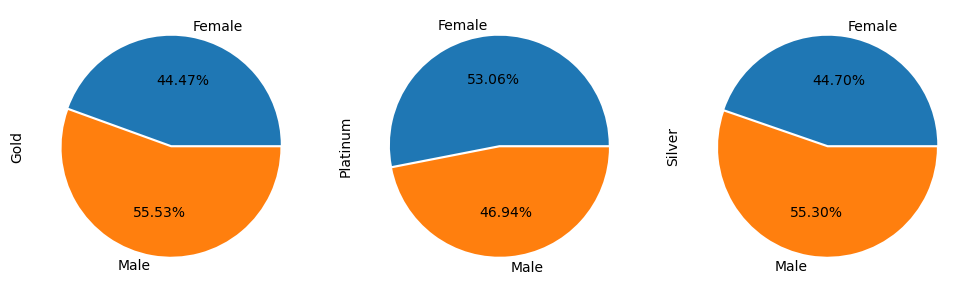

In [123]:
summary_pie = insurance_data.groupby(by=["Gender", "Segment"])["Claim_amount"].sum().reset_index()


summary_pie.pivot(index="Gender",columns="Segment", values="Claim_amount").plot(kind="pie",
                                                                                explode=[0.01]*2,
                                                                                autopct="%.2f%%",
                                                                                subplots=True, 
                                                                                legend=False,
                                                                               figsize=(12,8))
                                                               

plt.show()

#### 12. Among males and females, which gender had claimed the most for any
#### type of driver related issues? E.g. This metric can be compared using a
#### bar chart

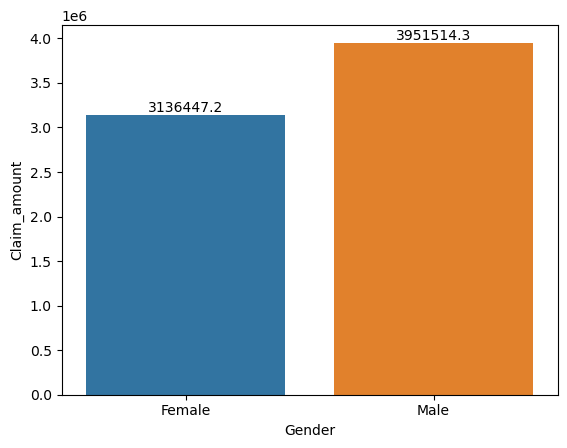

In [124]:
driving_issue_data = insurance_data.loc[insurance_data.Incident_cause.isin(["Driver error", "Other driver error"])]

summary_data =driving_issue_data.groupby(by="Gender").agg({"Claim_amount":"sum"})

chart = sns.barplot(data=summary_data, x=summary_data.index, y=summary_data.Claim_amount)

for i in chart.containers:
    labels = [v.get_height() for v in i]
    chart.bar_label(i, labels=labels, label_type="edge")



#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [125]:
fraud_data = insurance_data[insurance_data.Fraudulent=="Yes"]

fraud_data.head()

,Claim_id,Customer_id,Incident_cause,Claim_date,Claim_area,Police_report,Claim_type,Claim_amount,Total_policy_claims,Fraudulent,Gender,Dateofbirth,State,Contact,Segment,Alert_flag,Customer_age,Age_group
6,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,Male,1971-03-03,NE,783-653-9163,Gold,0,46,Adult
9,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,0,52,Adult
12,76762783,41673539,Crime,2018-01-06,Auto,Yes,Material and injury,44838.5,1.0,Yes,Female,1997-03-23,ID,738-935-7236,Platinum,0,21,Youth
14,37692448,44632301,Other driver error,2018-01-06,Auto,Yes,Injury only,44666.0,1.0,Yes,Female,1981-02-23,WV,261-697-1863,Silver,0,37,Adult
21,15510973,55982230,Other driver error,2018-01-06,Auto,Unknown,Material and injury,29428.5,1.0,Yes,Male,1991-05-05,MO,152-467-3764,Platinum,0,27,Youth


In [126]:
summary_fraud = pd.crosstab(index=fraud_data.Age_group, columns="Count_of_fraud",
                            values=fraud_data.Customer_id, aggfunc="count")


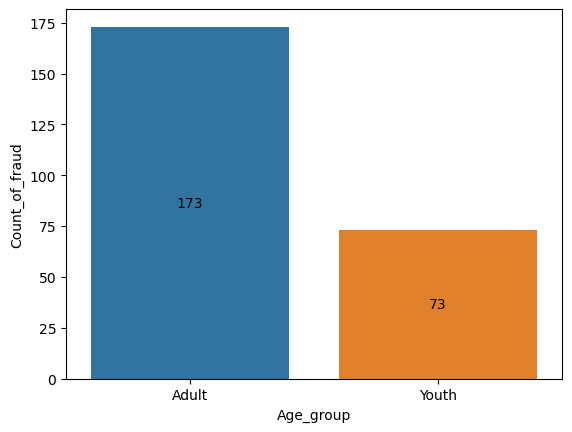

In [127]:
fraud_chart = sns.barplot(data=summary_data, x=summary_fraud.index, y=summary_fraud.Count_of_fraud)

for i in fraud_chart.containers:
    labels = [element.get_height().astype("int") for element in i]
    fraud_chart.bar_label(i, labels=labels, label_type="center")


#### 14. Visualize the monthly trend of the total amount that has been claimed
#### by the customers. Ensure that on the “month” axis, the month is in a
#### chronological order not alphabetical order.

In [128]:
insurance_data.insert(loc=4, column="Claim_month", value=insurance_data.Claim_date.dt.month_name())
insurance_data.insert(loc=5, column="Claim_nmonth", value=insurance_data.Claim_date.dt.month)

In [129]:
monthly_claims = insurance_data.groupby(by=["Claim_nmonth", "Claim_month"] ).agg({"Claim_amount":"sum"})

monthly_claims

,,Claim_amount
Claim_nmonth,Claim_month,
1,January,1327024.8
2,February,1127649.1
3,March,1320146.0
4,April,1292472.3
5,May,1114294.7
6,June,1278905.4
7,July,1379128.6
8,August,911234.7
9,September,982992.0


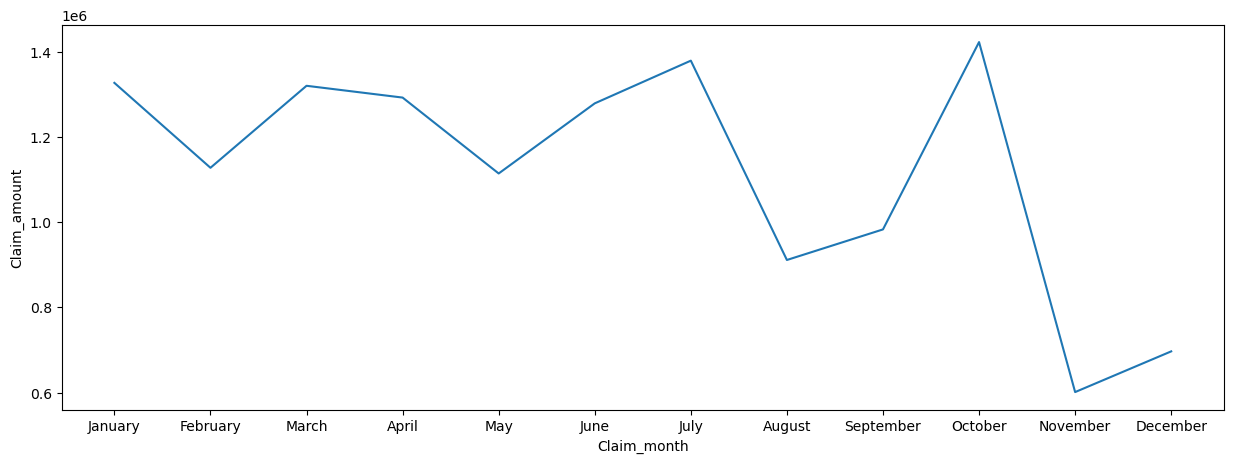

In [130]:
plt.figure(figsize=(15, 5))
trend = sns.lineplot(data=monthly_claims,x=monthly_claims.index.names[1] , y=monthly_claims.Claim_amount)

#### 15. What is the average claim amount for gender and age categories and
#### suitably represent the above using a facetted bar chart, one facet that
#### represents fraudulent claims and the other for non-fraudulent claims.

In [131]:
data_facet = insurance_data.groupby(by=["Gender",
                     "Age_group","Fraudulent" ]).agg({"Claim_amount":"mean"}
                                                    ).round(2).reset_index()
data_facet

,Gender,Age_group,Fraudulent,Claim_amount
0,Female,Adult,No,12372.89
1,Female,Adult,Yes,12448.47
2,Female,Children,No,20200.00
3,Female,Youth,No,12398.62
4,Female,Youth,Yes,7757.96
5,Male,Adult,No,12190.59
6,Male,Adult,Yes,17062.70
7,Male,Children,No,24610.00
8,Male,Youth,No,12199.82
9,Male,Youth,Yes,10684.37


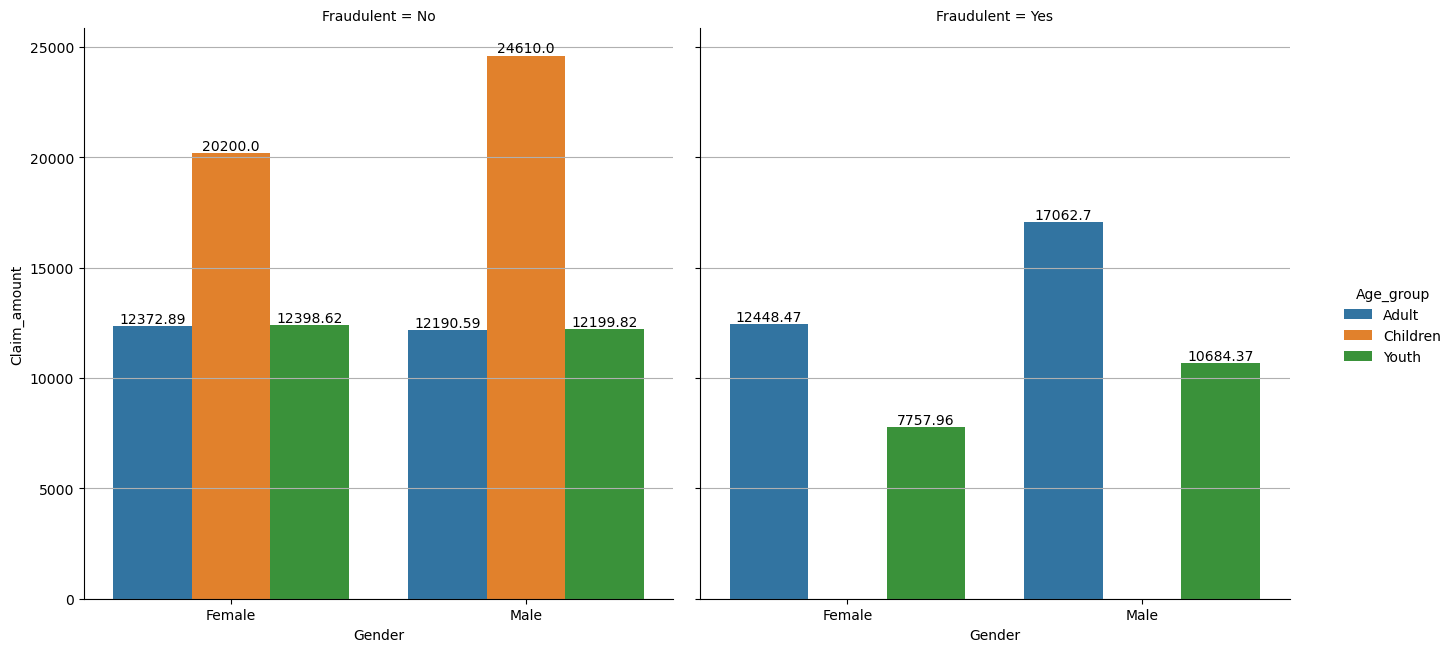

In [132]:
graph = sns.catplot(data=data_facet, x="Gender", y="Claim_amount", hue="Age_group", kind="bar",col="Fraudulent")

graph.fig.set_size_inches(15,7)

ax1 = graph.facet_axis(0,0)
ax2 = graph.facet_axis(0,1)


for i in ax1.containers:
    labels = [v.get_height() for v in i]
    ax1.bar_label(i, labels=labels, label_type="edge")
    ax1.grid(visible=True, axis="y")

for i in ax2.containers:
    labels = [v.get_height() for v in i]
    ax2.bar_label(i, labels=labels, label_type="edge")
    ax2.grid(visible=True, axis="y")

#### 16. Is there any similarity in the amount claimed by males and females?

In [133]:
insurance_data.drop("Claim_nmonth", axis=1, inplace=True)

In [134]:
insurance_data.head()

,Claim_id,Customer_id,Incident_cause,Claim_date,Claim_month,Claim_area,Police_report,Claim_type,Claim_amount,Total_policy_claims,Fraudulent,Gender,Dateofbirth,State,Contact,Segment,Alert_flag,Customer_age,Age_group
0,9476314,65176092,Other causes,2017-01-01,January,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0,41,Adult
1,70512964,22756942,Driver error,2017-01-01,January,Auto,Yes,Injury only,20310.0,1.0,No,Male,1982-10-09,FL,462-823-3126,Silver,0,34,Adult
2,97666948,97514724,Driver error,2017-01-01,January,Home,No,Injury only,19120.0,1.0,No,Male,1969-06-08,FL,641-684-7986,Platinum,1,48,Adult
3,61374372,77219712,Other causes,2017-01-01,January,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05,NH,649-592-8793,Platinum,0,17,Children
4,90591192,61745840,Other driver error,2017-01-01,January,Home,No,Material and injury,30930.0,1.0,No,Female,1994-07-24,MA,612-684-5472,Platinum,0,22,Youth


In [135]:
male_claims = insurance_data.loc[insurance_data.Gender=="Male", "Claim_amount"]
female_claims = insurance_data.loc[insurance_data.Gender=="Female", "Claim_amount"]

print(f"Mean of male claims- {male_claims.mean()}")
print(f"Mean of female claims- {female_claims.mean()}")


Mean of male claims- 12845.25662431943
Mean of female claims- 12100.014421252376


<AxesSubplot:xlabel='Claim_amount', ylabel='Count'>

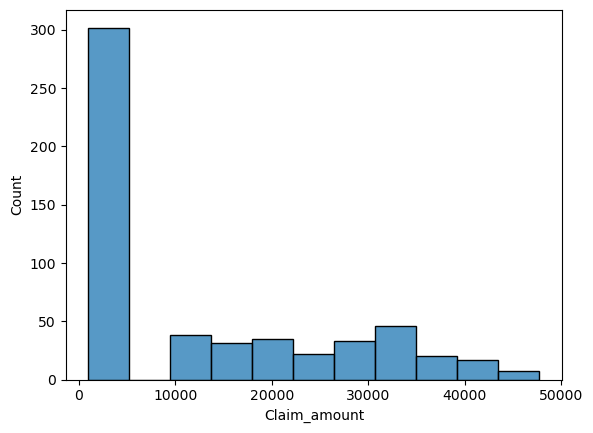

In [136]:
sns.histplot(male_claims)

<AxesSubplot:xlabel='Claim_amount', ylabel='Count'>

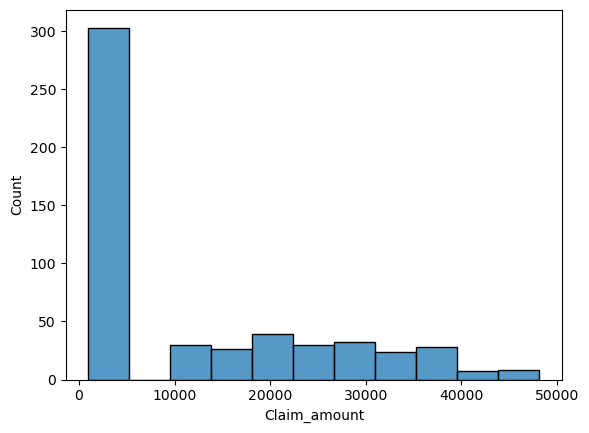

In [137]:
sns.histplot(female_claims)

#### define null hypothesis : 'H0'
            Mean of male claims = mean of female_claims
            
            There is a similarity in amount claimed by both gender
            
            
           
#### define alternate hypothesis: 'Ha'
            Mean of male claims != mean of female_claims
            
            There is not a similarity in amount claimed by both gender

#### define CI:
            
            Ci = 95%
            pvalue = 0.05


#### perform T-test:
    assumptions:
                * data values are independent and continuous
                * data values are from sample
                * data values are normally distributed
        


In [138]:
Result_t = stats.ttest_ind(male_claims, female_claims)

Result_t

Ttest_indResult(statistic=0.9152148897770083, pvalue=0.3602838818613777)

In [139]:
if Result_t.pvalue < 0.05:
    print("-- REJECT NULL HYPOTHESIS !")
elif Result_t.pvalue > 0.05:
    print("-- FAILED TO REJECT NULL HYPOTHESIS !")
else:
    print("Invalid")

-- FAILED TO REJECT NULL HYPOTHESIS !


#### Rejection rule:
            the new pvalue (significance level) 0.36 is greater than 0.05.
            
            Hence, we failed to reject the null hypothesis "H0"
            

#### Business Conclusion:
    
        with 95% confidence There is a similarity in amount claimed by both gender (Male & Female) as we can see by looking at the means of both gender and statistical analysis

#### 17. Is there any relationship between age category and segment?

<AxesSubplot:>

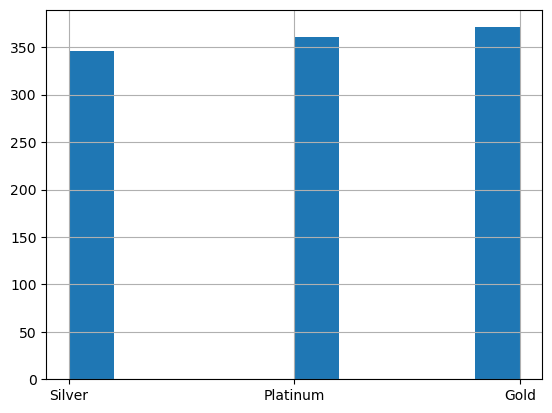

In [140]:
insurance_data.Segment.hist()

<AxesSubplot:>

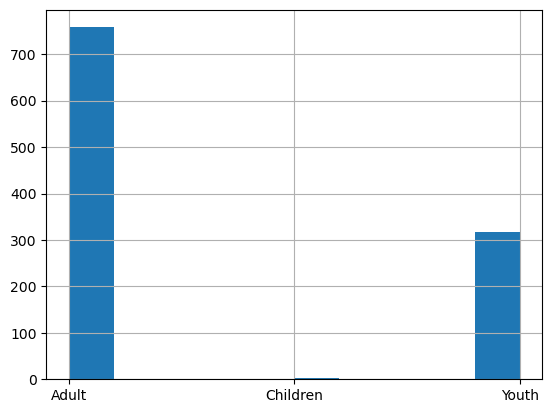

In [141]:
insurance_data.Age_group.hist()

###### 1. Define Null Hypothesis, H0:
    
            segment & Age_group are independent

###### 2. Define Alternate Hypothesis ,Ha:
        
            segment & Age_group are dependent

##### 3. Define CI & pvalues:
            
            CI = 95% 
            p values = 0.05
            
##### 4. Perform chi-squared test:
        assumptions:
                    * both variables are categorical
                    * data values are normally distributed
                    * data values in observed frequency table biased towards adult & youth

In [142]:
Obs_freq_tb = pd.crosstab(columns=insurance_data.Segment, index=insurance_data.Age_group)
Obs_freq_tb

Segment,Gold,Platinum,Silver
Age_group,,,
Adult,268,244,246
Children,1,1,0
Youth,102,116,100


In [143]:
stats.chi2_contingency(observed=Obs_freq_tb)

(2.9490863525635582,
 0.5663815153084528,
 4,
 array([[260.87012987, 253.83858998, 243.29128015],
        [  0.68831169,   0.66975881,   0.6419295 ],
        [109.44155844, 106.49165121, 102.06679035]]))

#### Rejection rule:
            - observed frequency table and expected frequency table are different.
            - the new pvalue (significance level) 0.56 is greater than 0.05.
            
            Hence, we failed to reject the null hypothesis "H0"
            

#### Business conclusion:
        
        with 95% Confidence, there is no relationship between age category and segment.
        

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [144]:
#2016 - 2017  one year
mean_of_claimAmount16 = 1000    #(population)

#2017-2018 (2017-01-01 to 2017-12-30) one year
mean_of_claimAmount17 = np.round(insurance_data.loc[insurance_data.Claim_date.dt.year==2017].Claim_amount.mean(), 2)
mean_of_claimAmount17          #(sample)

12330.14

In [145]:
ClaimAmount_17 =insurance_data.loc[insurance_data.Claim_date.dt.year==2017].Claim_amount

ClaimAmount_17

0       37290.0
1       20310.0
2       19120.0
3       20200.0
4       30930.0
         ...   
1073     2790.0
1074     1920.0
1075     1670.0
1076     2070.0
1077     2090.0
Name: Claim_amount, Length: 595, dtype: float64

###### 1. Define Null Hypothesis, H0:
    
            mean_of_claimAmount16 = mean_of_claimAmount17
        
###### 2. Define Alternate Hypothesis ,Ha:
        
             mean_of_claimAmount16 != mean_of_claimAmount17

##### 3. Define CI & pvalues:
            
            CI = 95% 
            p values = 0.05
            
##### 4. Perform T-test:
        assumptions:
                    * both variables are continuous
                    * data values are normally distributed
                    * comparing last year hypothesized value mean pop. with sample mean

In [146]:
Result_t1sample = stats.ttest_1samp( a = ClaimAmount_17, popmean = mean_of_claimAmount16 )

Result_t1sample

Ttest_1sampResult(statistic=20.797125374520228, pvalue=1.3802191614127859e-72)

In [147]:
if Result_t1sample.pvalue < 0.05:
    print("-- REJECT NULL HYPOTHESIS !")
elif Result_t1sample.pvalue > 0.05:
    print("-- FAILED TO REJECT NULL HYPOTHESIS !")
else:
    print("Invalid")

-- REJECT NULL HYPOTHESIS !


#### Rejection rule:
                   - the new pvalue (significance level) 1.3802191614127859e-72 is less than 0.05.
                   - t-score 20.797125374520228 is beyond the cut-off 1.960
            
                   Hence, we reject the null hypothesis "H0"
            

#### Business conclusion:
        
    with 95% Confidence,
        -last year claim amount is not equal to current year claim amount as per statiscal tests.
        -but by comparing the means of last and current year, we can say that 
        "The current year has shown a significant rise from 1000 to 12330.14 in claim amounts as compared to 2016-17" 
        

#### 19. Is there any difference between age groups and insurance claims?

In [148]:
Childern = insurance_data.loc[insurance_data.Age_group=="Children"].Claim_amount
Youth = insurance_data.loc[insurance_data.Age_group=="Youth"].Claim_amount
Adult = insurance_data.loc[insurance_data.Age_group=="Adult"].Claim_amount

print(f"mean of Children- {np.round(Childern.mean(), 2)}")
print(f"mean of Youth- {np.round(Youth.mean(), 2)}")
print(f"mean of Adult- {np.round(Adult.mean(), 2)}")


mean of Children- 22405.0
mean of Youth- 11604.87
mean of Adult- 12822.28


###### 1. Define Null Hypothesis, H0:

             mean of Children != mean of youth != mean of Adult
             
              There is some difference between different age categories (insuarance claim behavior)
        
###### 2. Define Alternate Hypothesis ,Ha:
    
            mean of Children = mean of youth = mean of Adult
            
            There is no difference between different age categories (insuarance claim behavior)

##### 3. Define CI & pvalues:
            
            CI = 95% 
            p values = 0.05
            
##### 4. Perform ANOVA (f-test):

In [149]:
Result_F = stats.f_oneway(Childern, Youth, Adult)

In [150]:
if Result_F.pvalue < 0.05:
    print("-- REJECT NULL HYPOTHESIS !")
elif Result_F.pvalue > 0.05:
    print("-- FAILED TO REJECT NULL HYPOTHESIS !")
else:
    print("Invalid")

-- FAILED TO REJECT NULL HYPOTHESIS !


#### Rejection rule:
            - the new pvalue (significance level) 0.22 is greater than 0.05.
            
            Hence, we failed to reject the null hypothesis "H0"
            

#### Business conclusion:
        
        - with 95% Confidence, there is some difference between different age categories (insuarance claim behavior).
        - The same can be seen by means of children, youth, adult.
        - So, the companies can come with new schemes for age categories which have high positivly using behavior and negativly using behavior to get their target Customers
        

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [151]:
insurance_data.loc[::,["Claim_amount", "Total_policy_claims"]]

,Claim_amount,Total_policy_claims
0,37290.0,3.0
1,20310.0,1.0
2,19120.0,1.0
3,20200.0,1.0
4,30930.0,1.0
...,...,...
1073,2790.0,3.0
1074,1920.0,2.0
1075,1670.0,2.0
1076,2070.0,1.0


###### 1. Define Null Hypothesis, H0:
    
            total number of policy claims & claimed amount are independent

###### 2. Define Alternate Hypothesis ,Ha:
        
            total number of policy claims & claimed amount are dependent

##### 3. Define CI & pvalues:
            
            CI = 95% 
            p values = 0.05
            
##### 4. Perform Co-relation (pearsonr)test:
        assumptions:
                    * data values are normally distributed

In [152]:
Result_p =  stats.pearsonr(insurance_data.Claim_amount, insurance_data.Total_policy_claims)

Result_p

PearsonRResult(statistic=-0.01850581472520098, pvalue=0.5438862132528441)

In [153]:
if Result_p.pvalue < 0.05:
    print("-- REJECT NULL HYPOTHESIS !")
elif Result_p.pvalue > 0.05:
    print("-- FAILED TO REJECT NULL HYPOTHESIS !")
else:
    print("Invalid")

-- FAILED TO REJECT NULL HYPOTHESIS !


#### Rejection rule:
            - "r" is -0.01 which is indirect and close to no relation
            - the new pvalue (significance level) 0.54 is greater than 0.05.
            
            Hence, we failed to reject the null hypothesis "H0"
            

#### Business conclusion:
        
            with 95% Confidence, - there is no relationship between total number of policy claims & claimed amount
                                 - they are independent variables
        